<a href="https://colab.research.google.com/github/shivani1912/Healthcare_NLP/blob/master/SentimentAnalysis_PredictiveModeling_Word2Vec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning Project: Sentiment Analysis on Healthcare data

# Business Understanding

Predicting sentiment of customers expressed in these reviews will allow the
product marketing team to gauge the customer satisfaction level and to take
appropriate actions to address negative feedback.
1.Model to predict sentiment
2.Context of topics in the model 

# Data understanding

In [ ]:
import json
import pandas as pd
%matplotlib inline
import tqdm
from tqdm.notebook import tqdm
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [ ]:
import re
import numpy as np
import pandas as pd
from pprint import pprint

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy for lemmatization
import spacy

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

In [ ]:
review = []
with open('Health_and_Personal_Care_5.json', encoding="UTF-8") as fp:
    for line in fp:
        rev = json.loads(line)
        review.append(rev)

review = pd.DataFrame(review)

In [ ]:
len(review)

346355

# Data preparation: Data Cleaning, Tokenization & Stop words removal

In [ ]:
#NLTK Stop words
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

    

In [ ]:
import re

# Convert to list
data = review.reviewText.values.tolist()


# Remove Emails
data = [re.sub('\S*@\S*\s?', '', sent) for sent in data]

# Remove new line characters
data = [re.sub('\s+', ' ', sent) for sent in data]

# Remove distracting single quotes
data = [re.sub("\'", "", sent) for sent in data]


In [ ]:
#tokenizing & removing punctuations
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(data))



In [ ]:
len(data_words)

346355

# Data preparation: Stemming


In [ ]:
#remove stopwords
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import *


stemmer = PorterStemmer()
def stemming(texts):
    texts_out = []
    for sent in texts:
        texts_out.append([stemmer.stem(word) for word in sent])
    return texts_out

In [ ]:
data_words_nostops = remove_stopwords(data_words)
data_stemmed = stemming(data_words_nostops)

print(data_stemmed[0:5])

[['great', 'littl', 'gadget', 'around', 'weve', 'alreadi', 'use', 'look', 'splinter', 'use', 'light', 'great', 'handi', 'size', 'howev', 'wish', 'id', 'bought', 'one', 'littl', 'higher', 'magnif'], ['would', 'recommend', 'travel', 'magnifi', 'occasion', 'read', 'read', 'anoth', 'review', 'magnifi', 'problem', 'light', 'come', 'find', 'one', 'appear', 'doa', 'box', 'open', 'shut', 'viewer', 'turn', 'light', 'light', 'began', 'come', 'sever', 'time', 'light', 'appear', 'come', 'time', 'small', 'take', 'someplac', 'read', 'thing', 'like', 'menu', 'dark', 'corner', 'restaur', 'great'], ['like', 'qualiti', 'len', 'built', 'light', 'len', 'discern', 'distort', 'anywher', 'magnifi', 'everyth', 'evenli', 'without', 'rippl', 'distort', 'ive', 'seen', 'low', 'cost', 'magnifi', 'light', 'nice', 'touch', 'easi', 'use', 'want', 'pull', 'len', 'bit', 'focus', 'close', 'center', 'look', 'provid', 'nice', 'even', 'coverag', 'didnt', 'like', 'bright', 'actual', 'dimm', 'light', 'focus', 'led', 'lot', '

In [ ]:
len(data_stemmed)

346355

# Data preparation: Word to Vec Conversion

In [ ]:
import gensim.models


model = gensim.models.word2vec.Word2Vec(
    sg=1,
    seed=42,
    workers=3, 
    min_count=10, 
    window=5)
     
model.build_vocab(sentences=data_stemmed)
print("The vocabulary is built")
print("Word2Vec vocabulary length: ", len(model.wv.vocab))


The vocabulary is built
Word2Vec vocabulary length:  17004


In [ ]:
all_reviews_vec = []
review_vec = np.zeros(100)
for review_text in data_stemmed:
    for word in review_text:
        try:
            review_vec = review_vec + model[word]
         
        except:
             continue  #some words are not in the model vocabulary, we assume its vector is 0 * 100 dimension
     
    all_reviews_vec.append(review_vec) 
    review_vec = np.zeros(100)

In [ ]:
len(all_reviews_vec)

346355

# Modeling: Setting the Y variable & splitting into Train & Test

In [ ]:
len(all_reviews_vec[1000])

100

In [ ]:
review_vec=pd.DataFrame(all_reviews_vec)

In [ ]:
review_vec.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.007353,-0.007914,-0.011647,0.023538,-0.008086,0.013961,-0.006420,-0.001027,-0.006167,-0.009650,...,-0.002626,0.002035,-0.014493,0.002701,-0.001201,-0.017506,0.000041,-0.002991,-0.018179,0.004532
1,0.030893,-0.006335,-0.001315,-0.004125,-0.005287,-0.007130,0.005752,0.017042,-0.024139,0.027196,...,0.019953,0.016582,-0.021303,-0.012404,-0.005324,0.006190,-0.020637,-0.021966,-0.011735,-0.025941
2,-0.006675,0.037450,-0.058256,0.043102,-0.030381,-0.023542,0.041010,0.021086,-0.005323,-0.067771,...,-0.030260,-0.021359,-0.058237,0.018744,-0.034753,0.011229,-0.051548,0.013513,0.014139,0.013390
3,-0.003254,-0.023621,0.010256,-0.001554,0.004874,0.006719,0.000091,0.021744,-0.015642,0.004099,...,-0.024440,0.024582,-0.020632,0.007950,0.026149,-0.006709,0.006665,-0.023926,0.009489,-0.010843
4,-0.011346,0.009422,-0.005538,-0.012450,-0.018265,0.006925,-0.004192,-0.012290,-0.004144,0.006804,...,-0.020158,0.028238,-0.017103,-0.000398,-0.015429,0.025166,-0.014462,0.001392,-0.009938,0.021494


In [ ]:
review_vec.to_csv('All_data_Word2Vec.csv')

In [ ]:
import pandas as pd
review_vec=pd.read_csv('All_data_Word2Vec.csv')

In [ ]:
review_vec

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,90,91,92,93,94,95,96,97,98,99
0,0,0.007353,-0.007914,-0.011647,0.023538,-0.008086,0.013961,-0.006420,-0.001027,-0.006167,...,-0.002626,0.002035,-0.014493,0.002701,-0.001201,-0.017506,0.000041,-0.002991,-0.018179,0.004532
1,1,0.030893,-0.006335,-0.001315,-0.004125,-0.005287,-0.007130,0.005752,0.017042,-0.024139,...,0.019953,0.016582,-0.021303,-0.012404,-0.005324,0.006190,-0.020637,-0.021966,-0.011735,-0.025941
2,2,-0.006675,0.037450,-0.058256,0.043102,-0.030381,-0.023542,0.041010,0.021086,-0.005323,...,-0.030260,-0.021359,-0.058237,0.018744,-0.034753,0.011229,-0.051548,0.013513,0.014139,0.013390
3,3,-0.003254,-0.023621,0.010256,-0.001554,0.004874,0.006719,0.000091,0.021744,-0.015642,...,-0.024440,0.024582,-0.020632,0.007950,0.026149,-0.006709,0.006665,-0.023926,0.009489,-0.010843
4,4,-0.011346,0.009422,-0.005538,-0.012450,-0.018265,0.006925,-0.004192,-0.012290,-0.004144,...,-0.020158,0.028238,-0.017103,-0.000398,-0.015429,0.025166,-0.014462,0.001392,-0.009938,0.021494
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346350,346350,-0.008210,0.000090,0.006245,-0.021921,0.009310,-0.002173,0.004896,-0.012092,0.006064,...,0.000318,0.001943,0.002360,-0.002849,-0.015391,-0.001064,-0.000644,-0.000652,0.006647,0.001764
346351,346351,0.002593,0.000896,-0.013936,0.006564,0.009009,-0.002185,-0.003217,0.015667,-0.015101,...,0.005286,0.015841,0.005263,0.006793,0.005340,0.007734,0.006278,0.017514,0.007166,0.000588
346352,346352,0.010561,0.009255,-0.005893,0.005509,0.026961,-0.017517,0.023168,0.020433,-0.013755,...,0.004488,0.027038,-0.018667,0.016262,0.016507,0.002377,-0.000433,0.014498,0.004208,0.031081
346353,346353,0.011155,0.004526,-0.004579,0.009571,0.012207,-0.016709,0.037436,0.018844,-0.042179,...,0.036876,0.017813,0.002284,0.012131,0.042070,0.001320,-0.002369,0.021763,-0.002752,-0.009712


In [ ]:
#negative sentiment is 1, positive sentiment is 0
all_data=pd.concat([review['overall'], review_vec], axis=1)
all_data.loc[all_data.overall <3 , 'Sentiment'] = 1
all_data.loc[all_data.overall >= 3, 'Sentiment'] = 0
all_data=all_data.drop(['overall'], axis=1)

In [ ]:
model_data=all_data[0:5000]

In [ ]:
model_data=model_data.drop(['Unnamed: 0'], axis=1)

In [ ]:
model_data

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,Sentiment
0,0.007353,-0.007914,-0.011647,0.023538,-0.008086,0.013961,-0.006420,-0.001027,-0.006167,-0.009650,...,0.002035,-0.014493,0.002701,-0.001201,-0.017506,0.000041,-0.002991,-0.018179,0.004532,0.0
1,0.030893,-0.006335,-0.001315,-0.004125,-0.005287,-0.007130,0.005752,0.017042,-0.024139,0.027196,...,0.016582,-0.021303,-0.012404,-0.005324,0.006190,-0.020637,-0.021966,-0.011735,-0.025941,0.0
2,-0.006675,0.037450,-0.058256,0.043102,-0.030381,-0.023542,0.041010,0.021086,-0.005323,-0.067771,...,-0.021359,-0.058237,0.018744,-0.034753,0.011229,-0.051548,0.013513,0.014139,0.013390,0.0
3,-0.003254,-0.023621,0.010256,-0.001554,0.004874,0.006719,0.000091,0.021744,-0.015642,0.004099,...,0.024582,-0.020632,0.007950,0.026149,-0.006709,0.006665,-0.023926,0.009489,-0.010843,0.0
4,-0.011346,0.009422,-0.005538,-0.012450,-0.018265,0.006925,-0.004192,-0.012290,-0.004144,0.006804,...,0.028238,-0.017103,-0.000398,-0.015429,0.025166,-0.014462,0.001392,-0.009938,0.021494,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.019136,-0.002178,-0.011625,0.022120,-0.007130,0.014280,0.001734,0.015283,0.000283,0.002538,...,0.024656,0.010490,-0.017422,0.017684,0.018279,-0.018311,-0.000553,-0.017756,-0.000246,0.0
4996,-0.020885,0.054899,-0.024450,0.068251,-0.041456,0.057327,0.001013,0.059409,-0.042674,0.013005,...,-0.007687,0.083449,-0.016194,0.003843,0.058584,-0.069480,0.003791,0.003923,-0.015146,0.0
4997,0.019197,-0.022789,-0.004311,0.012212,-0.004354,0.007857,-0.022006,0.006060,-0.012523,-0.015703,...,0.000471,0.012641,-0.010773,0.007404,0.012114,-0.002094,0.019178,-0.002037,-0.016075,0.0
4998,-0.006281,0.003756,-0.001622,-0.001098,0.001587,-0.001117,0.008227,0.003303,-0.003908,-0.002742,...,0.008434,0.021281,0.004417,0.007237,-0.003144,0.014231,0.019486,0.003839,0.012531,0.0


In [ ]:
#split into train and test
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import RFECV
from sklearn.datasets import make_regression
from sklearn import datasets, linear_model
import warnings
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE




pts = np.random.rand(len(model_data)) < 0.7

clean_data_train = model_data[pts]
clean_data_test = model_data[~pts]


#training set
X_train = clean_data_train.copy()
X_train = X_train.drop(['Sentiment'], axis=1)
Y_train =clean_data_train['Sentiment']

#SMOTE
oversampler=SMOTE(random_state=0)
X_train,Y_train=oversampler.fit_sample(X_train,Y_train)

#testing set
#Prepping the test set
X_test = clean_data_test.copy()
X_test = X_test.drop(['Sentiment'], axis=1)
Y_test = clean_data_test['Sentiment']


Using TensorFlow backend.


# Modeling & Evaluation: Logistic Regression

In [ ]:
import statsmodels.api as sm
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn import metrics
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver='lbfgs')
logreg.fit(X_train, Y_train)

LogisticRegression()

In [ ]:
Y_pred = logreg.predict(X_test)

#Testing set accuracy
from sklearn.metrics import accuracy_score
print('accuracy score',accuracy_score(Y_test, Y_pred))

#Precision=True positive / (True positive + False positive)
#Recall=True positive / (True positive + False negative)
#F1 is the harmonic mean of precision and recall
from sklearn.metrics import f1_score
print('f1_score',f1_score(Y_test, Y_pred))

#F1 is the harmonic mean of precision and recall
from sklearn.metrics import classification_report
print ("\n Classification report : \n",classification_report(Y_test,Y_pred))

accuracy score 0.6176084099868594
f1_score 0.22811671087533156

 Classification report : 
               precision    recall  f1-score   support

         0.0       0.92      0.63      0.75      1359
         1.0       0.15      0.53      0.23       163

    accuracy                           0.62      1522
   macro avg       0.53      0.58      0.49      1522
weighted avg       0.83      0.62      0.69      1522



[[854 505]
 [ 77  86]]


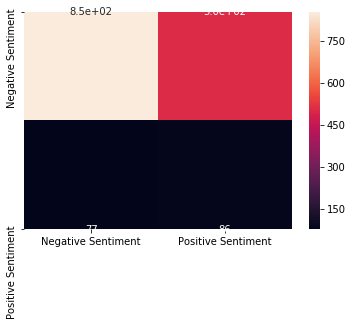

In [ ]:
#Confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)
sns.heatmap(cm,xticklabels = ["Negative Sentiment","Positive Sentiment"],yticklabels = ["Negative Sentiment","Positive Sentiment"], annot=True)
print(cm)

Area under curve :  0.5780052998189755 



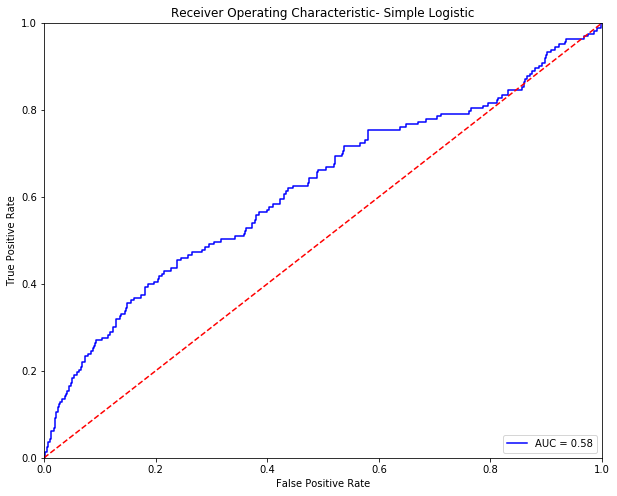

In [ ]:
import matplotlib.pyplot as plt
#predicted probabilities
probabilities = logreg.predict_proba(X_test)

from sklearn.metrics import roc_curve,roc_auc_score
#Compute ROC Score
model_roc_auc = roc_auc_score(Y_test, Y_pred)
print ("Area under curve : ",model_roc_auc,"\n")
fpr,tpr,thresholds = roc_curve(Y_test,probabilities[:,1])

plt.figure(figsize=(10, 8))
plt.title('Receiver Operating Characteristic- Simple Logistic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % model_roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


<h6> Logistic Regression: Hyperparameter tuning with GridSearch

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver='liblinear')
logreg.fit(X_train, Y_train)

# Create regularization penalty space
penalty = ['l1', 'l2'] #Lasso,Ridge respectively

# Create regularization hyperparameter space
C = np.logspace(0, 4, 10)

# Creating a dictionary of hyperparameter options
hyperparameters = dict(C=C, penalty=penalty)

In [ ]:
# Grid search using 5-fold cross validation
clf = GridSearchCV(logreg, hyperparameters, cv=10, verbose=0)

# Fit the best model from grid search
best_model = clf.fit(X_train, Y_train)

In [ ]:
#best parameter
best_model.best_params_

{'C': 166.81005372000593, 'penalty': 'l2'}

In [ ]:
# Predict target vector
Y_pred = best_model.predict(X_test)

#Testing set accuracy
from sklearn.metrics import accuracy_score
print('accuracy score',accuracy_score(Y_test, Y_pred))

#Precision=True positive / (True positive + False positive)
#Recall=True positive / (True positive + False negative)
#F1 is the harmonic mean of precision and recall
from sklearn.metrics import f1_score
print('f1_score',f1_score(Y_test, Y_pred))
#F1 is the harmonic mean of precision and recall

from sklearn.metrics import classification_report
print ("\n Classification report : \n",classification_report(Y_test,Y_pred))

accuracy score 0.657030223390276
f1_score 0.2564102564102564

 Classification report : 
               precision    recall  f1-score   support

         0.0       0.93      0.67      0.78      1359
         1.0       0.17      0.55      0.26       163

    accuracy                           0.66      1522
   macro avg       0.55      0.61      0.52      1522
weighted avg       0.84      0.66      0.72      1522



[[910 449]
 [ 73  90]]


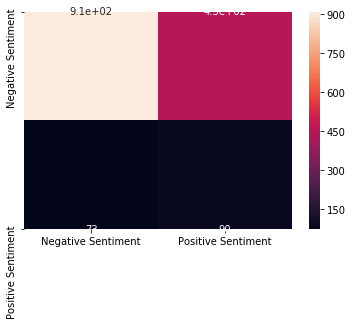

In [ ]:
#Confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)
sns.heatmap(cm,xticklabels = ["Negative Sentiment","Positive Sentiment"],yticklabels = ["Negative Sentiment","Positive Sentiment"], annot=True)
print(cm)

Area under curve :  0.6108786233110777 



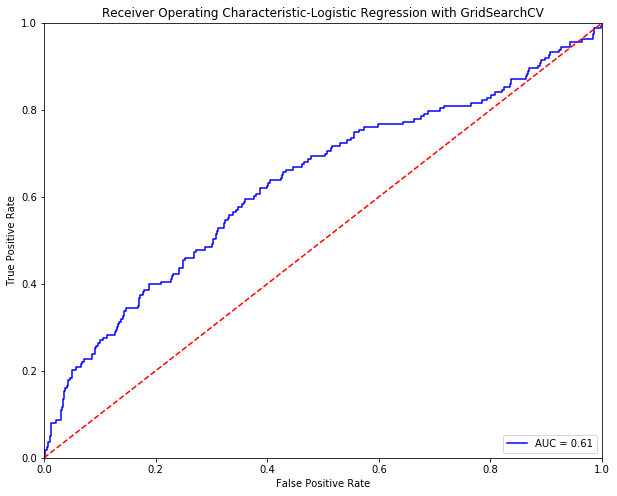

In [ ]:

#predicted probabilities
probabilities = best_model.predict_proba(X_test)[:,1]

from sklearn.metrics import roc_curve,roc_auc_score
#Compute ROC Score
model_roc_auc = roc_auc_score(Y_test, Y_pred)
print ("Area under curve : ",model_roc_auc,"\n")
fpr,tpr,thresholds = roc_curve(Y_test,probabilities)

plt.figure(figsize=(10, 8))
plt.title('Receiver Operating Characteristic-Logistic Regression with GridSearchCV')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % model_roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


# Modeling & Evaluation: Random Forest

In [ ]:
# Import the model we are using
from sklearn.ensemble import RandomForestClassifier

# Create the model with 100 trees
model_rf = RandomForestClassifier(n_estimators=100, 
                               bootstrap = True,
                               max_features = 'sqrt')


# Train the model on training data
model_rf.fit(X_train, Y_train)

# Use the forest's predict method on the test data

from sklearn.metrics import roc_auc_score
Y_pred = model_rf.predict(X_test)


print('accuracy score',accuracy_score(Y_test, Y_pred))
print('f1_score',f1_score(Y_test, Y_pred))
print ("\n Classification report : \n",classification_report(Y_test,Y_pred))

accuracy score 0.8751642575558476
f1_score 0.05

 Classification report : 
               precision    recall  f1-score   support

         0.0       0.89      0.98      0.93      1359
         1.0       0.14      0.03      0.05       163

    accuracy                           0.88      1522
   macro avg       0.51      0.50      0.49      1522
weighted avg       0.81      0.88      0.84      1522



[[1327   32]
 [ 158    5]]


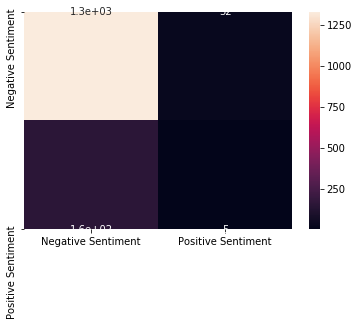

In [ ]:
#Confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)
sns.heatmap(cm,xticklabels = ["Negative Sentiment","Positive Sentiment"],yticklabels = ["Negative Sentiment","Positive Sentiment"], annot=True)
print(cm)

Area under curve :  0.5035640605461432 



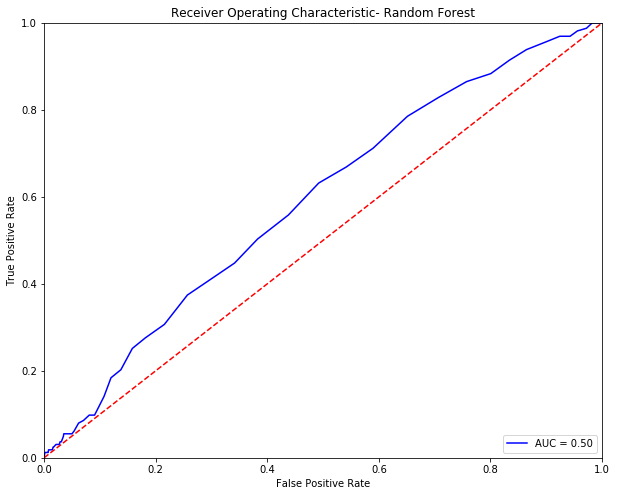

In [ ]:
Y_pred_probs = model_rf.predict_proba(X_test)[:, 1]
model_roc_auc = roc_auc_score(Y_test, Y_pred)
print ("Area under curve : ",model_roc_auc,"\n")
fpr,tpr,thresholds = roc_curve(Y_test,Y_pred_probs)

plt.figure(figsize=(10, 8))
plt.title('Receiver Operating Characteristic- Random Forest')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % model_roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


<h6> Random Forest with GridSearch

In [ ]:
#random forests with cross validation i.e.,  hyperparameter tuning:grid search
from sklearn.model_selection import RandomizedSearchCV

#creating the random grid with hyperparameters
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
#criterion
criterion=['gini', 'entropy']

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap,
                'criterion':criterion}


# First create the base model to tune
rf = RandomForestClassifier(random_state=42)
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, Y_train)


Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed: 14.2min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed: 67.5min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 106.5min finished


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [ ]:
#best parameter
rf_random.best_params_

{'n_estimators': 600,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 90,
 'criterion': 'entropy',
 'bootstrap': False}

In [ ]:
Y_pred = rf_random.predict(X_test)
print('accuracy score',accuracy_score(Y_test, Y_pred))
print('f1_score',f1_score(Y_test, Y_pred))
print ("\n Classification report : \n",classification_report(Y_test,Y_pred))


accuracy score 0.8823915900131406
f1_score 0.032432432432432434

 Classification report : 
               precision    recall  f1-score   support

         0.0       0.89      0.99      0.94      1359
         1.0       0.14      0.02      0.03       163

    accuracy                           0.88      1522
   macro avg       0.51      0.50      0.48      1522
weighted avg       0.81      0.88      0.84      1522



[[1340   19]
 [ 160    3]]


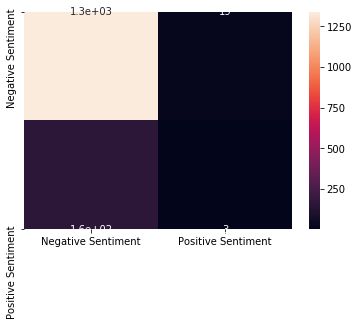

In [ ]:
#Confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)
sns.heatmap(cm,xticklabels = ["Negative Sentiment","Positive Sentiment"],yticklabels = ["Negative Sentiment","Positive Sentiment"], annot=True)
print(cm)

Area under curve :  0.502212019844978 



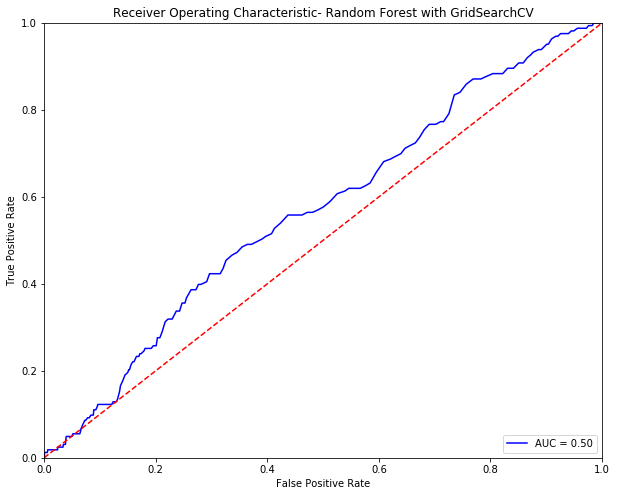

In [ ]:
#predicted probabilities
Y_pred_probs = rf_random.predict_proba(X_test)[:, 1]

from sklearn.metrics import roc_curve,roc_auc_score
#Compute ROC Score
model_roc_auc = roc_auc_score(Y_test, Y_pred)
print ("Area under curve : ",model_roc_auc,"\n")
fpr,tpr,thresholds = roc_curve(Y_test,Y_pred_probs)

plt.figure(figsize=(10, 8))
plt.title('Receiver Operating Characteristic- Random Forest with GridSearchCV')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % model_roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


# # Modeling & Evaluation: SVM

In [ ]:
from sklearn.svm import SVC  

In [ ]:
kernels = ['Polynomial', 'RBF', 'Sigmoid','Linear']
#A function which returns the corresponding SVC model
def getClassifier(ktype):
    if ktype == 0:
        # Polynomial kernal
        return SVC(kernel='poly', degree=8, gamma="auto",probability=True)
    elif ktype == 1:
        # Radial Basis Function kernal
        return SVC(kernel='rbf', gamma="auto",probability=True)
    elif ktype == 2:
        # Sigmoid kernal
        return SVC(kernel='sigmoid', gamma="auto",probability=True)
        

In [ ]:
for i in range(3):
    svclassifier = getClassifier(i) 
    svclassifier.fit(X_train, Y_train)
# Make prediction
    Y_pred = svclassifier.predict(X_test)
# Evaluate our model
    print("Evaluation:", kernels[i], "kernel")
    print(confusion_matrix(Y_test,Y_pred))
    print(classification_report(Y_test,Y_pred))

Evaluation: Polynomial kernel
[[1359    0]
 [ 163    0]]
              precision    recall  f1-score   support

         0.0       0.89      1.00      0.94      1359
         1.0       0.00      0.00      0.00       163

    accuracy                           0.89      1522
   macro avg       0.45      0.50      0.47      1522
weighted avg       0.80      0.89      0.84      1522



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Evaluation: RBF kernel
[[  30 1329]
 [   4  159]]
              precision    recall  f1-score   support

         0.0       0.88      0.02      0.04      1359
         1.0       0.11      0.98      0.19       163

    accuracy                           0.12      1522
   macro avg       0.49      0.50      0.12      1522
weighted avg       0.80      0.12      0.06      1522

Evaluation: Sigmoid kernel
[[  31 1328]
 [   4  159]]
              precision    recall  f1-score   support

         0.0       0.89      0.02      0.04      1359
         1.0       0.11      0.98      0.19       163

    accuracy                           0.12      1522
   macro avg       0.50      0.50      0.12      1522
weighted avg       0.80      0.12      0.06      1522



[[  31 1328]
 [   4  159]]


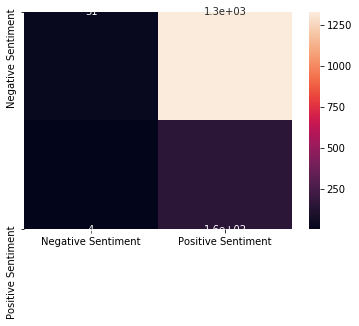

In [ ]:
#Confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)
sns.heatmap(cm,xticklabels = ["Negative Sentiment","Positive Sentiment"],yticklabels = ["Negative Sentiment","Positive Sentiment"], annot=True)
print(cm)

Area under curve :  0.4991355065299729 



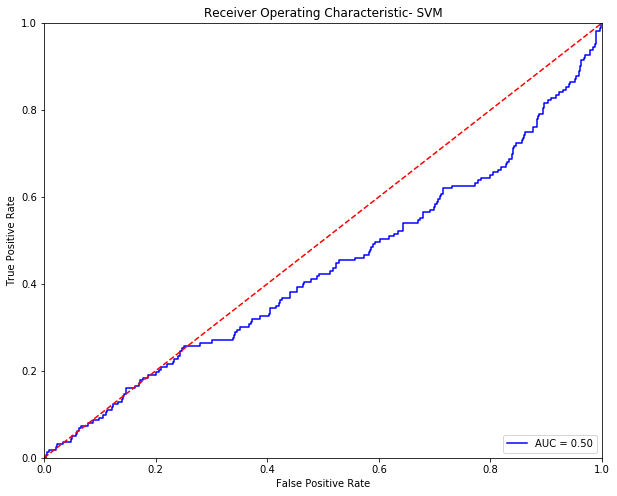

In [ ]:
#predicted probabilities
Y_pred_probs = svclassifier.predict_proba(X_test)[:, 1]

from sklearn.metrics import roc_curve,roc_auc_score
#Compute ROC Score
model_roc_auc = roc_auc_score(Y_test, Y_pred)
print ("Area under curve : ",model_roc_auc,"\n")
fpr,tpr,thresholds = roc_curve(Y_test,Y_pred_probs)

plt.figure(figsize=(10, 8))
plt.title('Receiver Operating Characteristic- SVM')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % model_roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

SVM: Hyper parameter tuning with GridSearchCV

In [ ]:
#selecting only rbf & sigmoid kernel as in previous SVM we see that they perform better and also to reduce computational time
param_grid = {'C': [0.1,1, 100], 'gamma': [1,0.1,0.01],'kernel': ['rbf','sigmoid']}
grid = GridSearchCV(SVC(probability=True),param_grid,refit=True,verbose=2)
grid.fit(X_train,Y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=  27.9s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   27.8s remaining:    0.0s


[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=  27.2s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=  27.3s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=  27.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=  27.1s
[CV] C=0.1, gamma=1, kernel=sigmoid ..................................
[CV] ................... C=0.1, gamma=1, kernel=sigmoid, total=  26.8s
[CV] C=0.1, gamma=1, kernel=sigmoid ..................................
[CV] ................... C=0.1, gamma=1, kernel=sigmoid, total=  26.8s
[CV] C=0.1, gamma=1, kernel=sigmoid ..................................
[CV] ................... C=0.1, gamma=1, kernel=sigmoid, total=  27.3s
[CV] C=0.1, gamma=1, kernel=sigmoid ..................................
[CV] .

[CV] .................. C=1, gamma=0.01, kernel=sigmoid, total=  19.4s
[CV] C=100, gamma=1, kernel=rbf ......................................
[CV] ....................... C=100, gamma=1, kernel=rbf, total=  13.4s
[CV] C=100, gamma=1, kernel=rbf ......................................
[CV] ....................... C=100, gamma=1, kernel=rbf, total=  13.7s
[CV] C=100, gamma=1, kernel=rbf ......................................
[CV] ....................... C=100, gamma=1, kernel=rbf, total=  14.0s
[CV] C=100, gamma=1, kernel=rbf ......................................
[CV] ....................... C=100, gamma=1, kernel=rbf, total=  13.9s
[CV] C=100, gamma=1, kernel=rbf ......................................
[CV] ....................... C=100, gamma=1, kernel=rbf, total=  13.9s
[CV] C=100, gamma=1, kernel=sigmoid ..................................
[CV] ................... C=100, gamma=1, kernel=sigmoid, total=  14.7s
[CV] C=100, gamma=1, kernel=sigmoid ..................................
[CV] .

[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed: 28.2min finished


GridSearchCV(estimator=SVC(probability=True),
             param_grid={'C': [0.1, 1, 100], 'gamma': [1, 0.1, 0.01],
                         'kernel': ['rbf', 'sigmoid']},
             verbose=2)

In [ ]:
#best parameters
grid.best_params_

{'C': 100, 'gamma': 1, 'kernel': 'rbf'}

In [ ]:
# Make prediction
Y_pred = grid.predict(X_test)
print(confusion_matrix(Y_test,Y_pred))
print(classification_report(Y_test,Y_pred))

[[1017  342]
 [ 101   62]]
              precision    recall  f1-score   support

         0.0       0.91      0.75      0.82      1359
         1.0       0.15      0.38      0.22       163

    accuracy                           0.71      1522
   macro avg       0.53      0.56      0.52      1522
weighted avg       0.83      0.71      0.76      1522



[[1017  342]
 [ 101   62]]


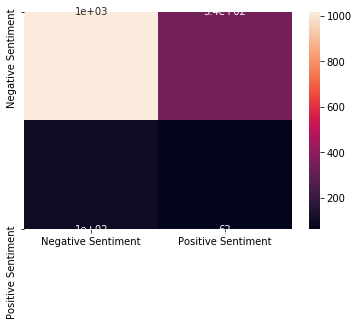

In [ ]:
#Confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)
sns.heatmap(cm,xticklabels = ["Negative Sentiment","Positive Sentiment"],yticklabels = ["Negative Sentiment","Positive Sentiment"], annot=True)
print(cm)

Area under curve :  0.5643562345102182 



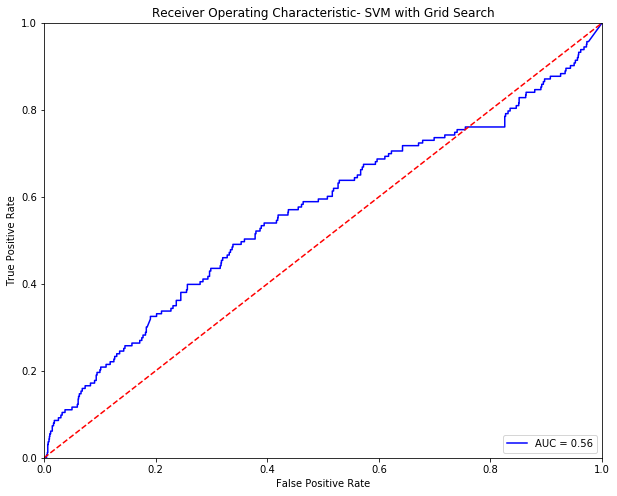

In [ ]:
#predicted probabilities
Y_pred_probs = grid.predict_proba(X_test)[:, 1]

from sklearn.metrics import roc_curve,roc_auc_score
#Compute ROC Score
model_roc_auc = roc_auc_score(Y_test, Y_pred)
print ("Area under curve : ",model_roc_auc,"\n")
fpr,tpr,thresholds = roc_curve(Y_test,Y_pred_probs)

plt.figure(figsize=(10, 8))
plt.title('Receiver Operating Characteristic- SVM with Grid Search')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % model_roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Implications for the Business 


As our aim to find all the negative reviews in the feedback, recall is the metric of concern for our business case.
We aren't worried about a positive review being classified as negative but are more concerned with negative reviews being classified as positive. 


Based on the recall values for negative reviews (Y=1) we observe that Logistic Regression performs better than the others in terms of its recall as well as stability.

Hence, we use logistic regression for word2vec vectors to predict sentiment of the reviews.

Note: We have taken 5000 records to reduce the computational resources required i.e., keep our laptops from crashing.